# Data Visualization

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

np.random.seed(42)

In [2]:
trade = pd.read_csv('trade_train.csv')
stocks = pd.read_csv('stocks.csv')

데이터 전처리

In [3]:
# trade.info() # null값 없음
# stocks.info()
trade.loc[trade['그룹내_매수여부']=='Y','그룹내_매수여부']=1
trade.loc[trade['그룹내_매수여부']=='N','그룹내_매수여부']=0

trade.loc[trade['그룹내_매도여부']=='Y','그룹내_매도여부']=1
trade.loc[trade['그룹내_매도여부']=='N','그룹내_매도여부']=0

trade.loc[trade['매수가격_중앙값']==-1,'매수가격_중앙값']=0
trade.loc[trade['매도가격_중앙값']==-1,'매도가격_중앙값']=0

trade.head()

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,1,1,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,1,1,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,1,1,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,1,1,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,1,1,13,19,34,101,45350,46850


In [4]:
trade.rename(columns = {'Unnamed: 0' : 'index', '기준년월':'year_month', '그룹번호':'Group_num', '그룹내고객수':'Customer_cnt', 
                       '종목번호':'Stock_num', '그룹내_매수여부':'Buying_YN', '그룹내_매도여부':'Selling_YN', '매수고객수':'Buyer_cnt',
                        '매도고객수':'Seller_cnt', '평균매수수량':'Buying_cnt_avg', '평균매도수량':'Selling_cnt_avg', 
                        '매수가격_중앙값':'BuyingPrice_median', '매도가격_중앙값':'SellingPrice_median'}, inplace = True)
# trade.head()

In [5]:
trade = trade.astype({
    'Buying_YN':int,
    'Selling_YN':int
})
df=trade.drop("index", axis=1)

### 변수 추가
- 시간 변수

In [6]:
df["datetime"] = pd.to_datetime(df["year_month"], format='%Y%m')
df.head()

,year_month,Group_num,Customer_cnt,Stock_num,Buying_YN,Selling_YN,Buyer_cnt,Seller_cnt,Buying_cnt_avg,Selling_cnt_avg,BuyingPrice_median,SellingPrice_median,datetime
0,201907,MAD01,288,A000660,1,1,7,17,19,234,74800,78500,2019-07-01
1,201907,MAD01,288,A001820,1,1,3,4,533,154,47385,46700,2019-07-01
2,201907,MAD01,288,A004020,1,1,3,3,409,528,41411,40000,2019-07-01
3,201907,MAD01,288,A005380,1,1,4,3,323,451,140602,140628,2019-07-01
4,201907,MAD01,288,A005930,1,1,13,19,34,101,45350,46850,2019-07-01


- 평균 매수/매도 금액 feature

In [7]:
df2 = df.copy()
df2["BuyingPrice_avg"] = (df2["Buying_cnt_avg"]*df2["BuyingPrice_median"])//df2["Buyer_cnt"]
df2["SellingPrice_avg"] = (df2["Selling_cnt_avg"]*df2["SellingPrice_median"])//df2["Seller_cnt"]
df2.head()

,year_month,Group_num,Customer_cnt,Stock_num,Buying_YN,Selling_YN,Buyer_cnt,Seller_cnt,Buying_cnt_avg,Selling_cnt_avg,BuyingPrice_median,SellingPrice_median,datetime,BuyingPrice_avg,SellingPrice_avg
0,201907,MAD01,288,A000660,1,1,7,17,19,234,74800,78500,2019-07-01,203028.0,1080529.0
1,201907,MAD01,288,A001820,1,1,3,4,533,154,47385,46700,2019-07-01,8418735.0,1797950.0
2,201907,MAD01,288,A004020,1,1,3,3,409,528,41411,40000,2019-07-01,5645699.0,7040000.0
3,201907,MAD01,288,A005380,1,1,4,3,323,451,140602,140628,2019-07-01,11353611.0,21141076.0
4,201907,MAD01,288,A005930,1,1,13,19,34,101,45350,46850,2019-07-01,118607.0,249044.0


In [8]:
corr_matrix=df.corr()
corr_matrix["Buyer_cnt"].sort_values(ascending=False)

Buyer_cnt              1.000000
Seller_cnt             0.942185
Customer_cnt           0.109904
BuyingPrice_median     0.100325
SellingPrice_median    0.096517
year_month             0.080428
Buying_YN              0.072845
Selling_YN             0.035084
Buying_cnt_avg        -0.010693
Selling_cnt_avg       -0.011677
Name: Buyer_cnt, dtype: float64

In [9]:
corr_matrix=df2[df2["Group_num"]=='MAD01'].corr()
corr_matrix["Buyer_cnt"].sort_values(ascending=False)

Buyer_cnt              1.000000
Seller_cnt             0.915421
Buying_YN              0.150230
Selling_YN             0.101274
year_month             0.091232
BuyingPrice_median    -0.026773
SellingPrice_median   -0.030141
Selling_cnt_avg       -0.072335
Buying_cnt_avg        -0.076701
SellingPrice_avg      -0.200430
BuyingPrice_avg       -0.232728
Customer_cnt                NaN
Name: Buyer_cnt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187185A3A08>,
      dtype=object)

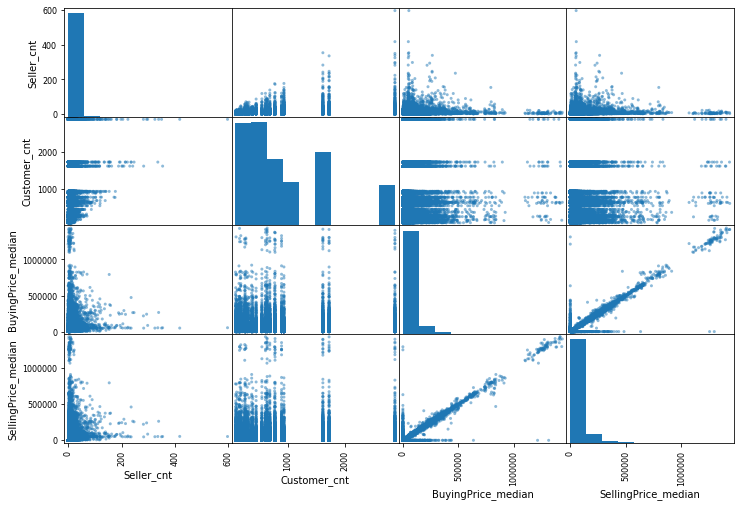

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["Seller_cnt", "Customer_cnt", "BuyingPrice_median", "SellingPrice_median"]
scatter_matrix(df2[attributes], figsize=(12, 8))

### 주식 매수 그래프

In [11]:
group = df["Group_num"].values
group = pd.unique(group)
group # len(group)=48

array(['MAD01', 'MAD02', 'MAD03', 'MAD04', 'MAD05', 'MAD06', 'MAD07',
       'MAD08', 'MAD09', 'MAD10', 'MAD11', 'MAD12', 'MAD13', 'MAD14',
       'MAD15', 'MAD16', 'MAD17', 'MAD18', 'MAD19', 'MAD20', 'MAD21',
       'MAD22', 'MAD23', 'MAD24', 'MAD25', 'MAD26', 'MAD27', 'MAD28',
       'MAD29', 'MAD30', 'MAD31', 'MAD32', 'MAD33', 'MAD34', 'MAD35',
       'MAD36', 'MAD37', 'MAD38', 'MAD39', 'MAD41', 'MAD42', 'MAD43',
       'MAD44', 'MAD45', 'MAD46', 'MAD47', 'MAD48', 'MAD40'], dtype=object)

- 그룹별 총 주식 매수 그래프

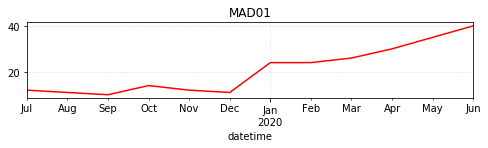

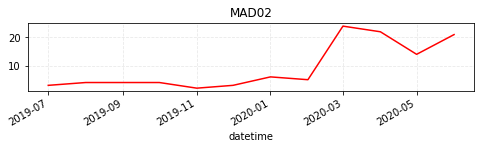

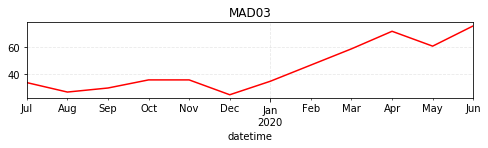

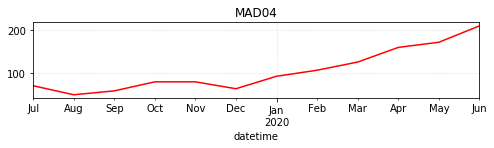

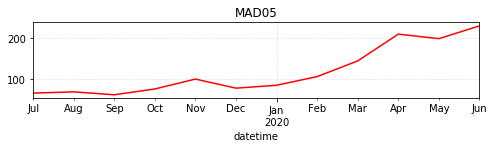

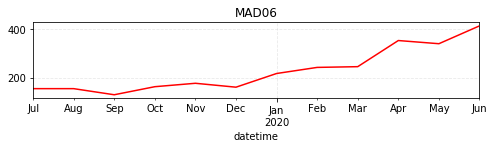

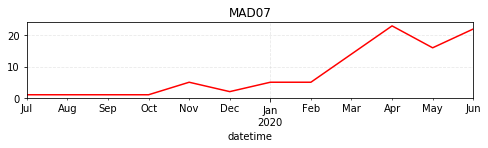

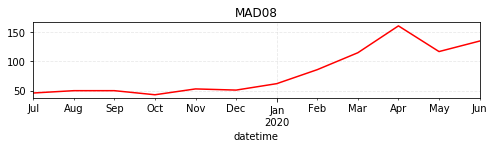

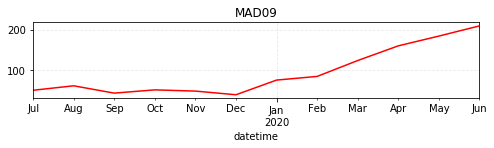

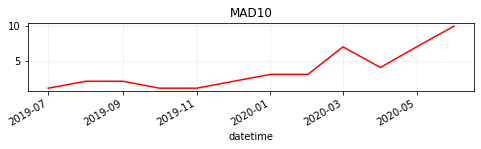

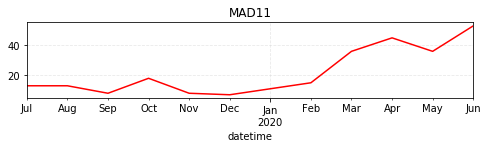

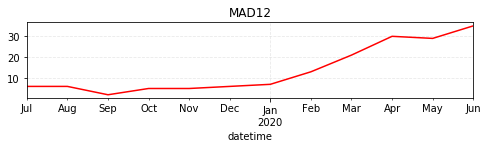

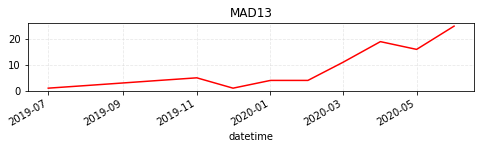

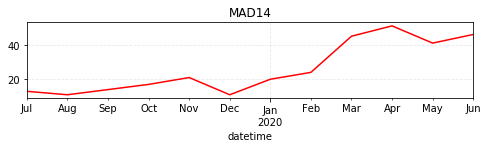

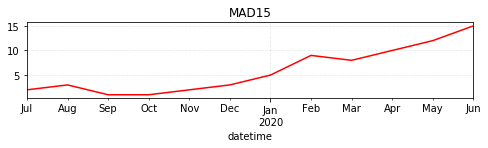

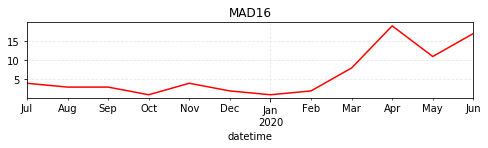

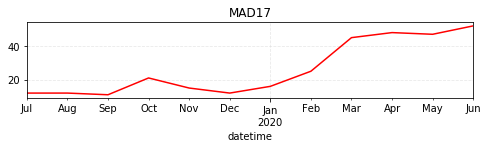

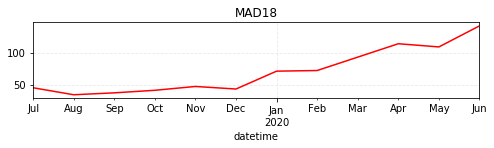

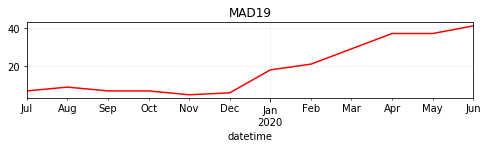

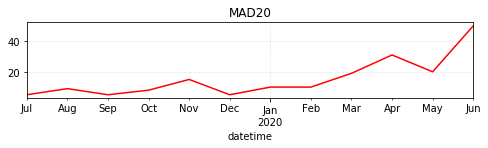

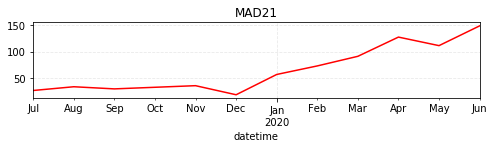

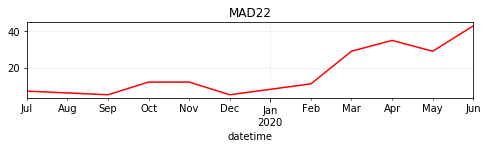

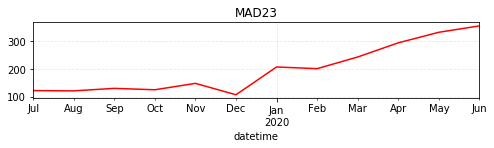

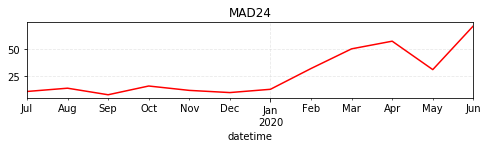

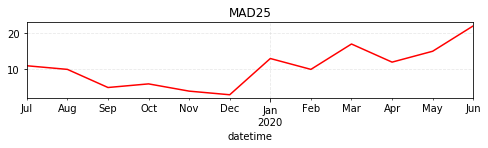

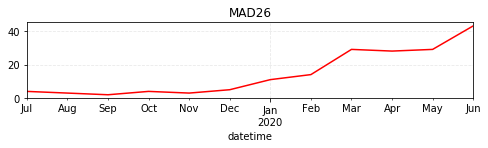

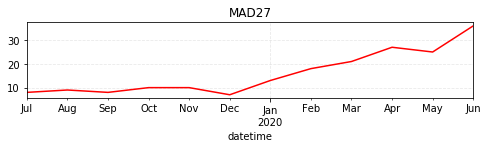

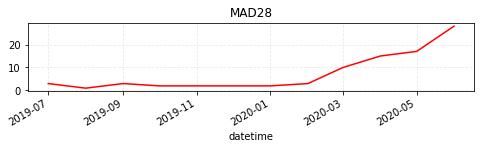

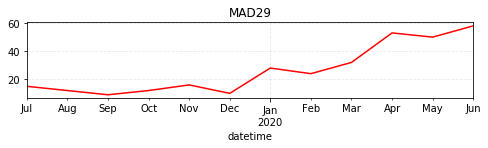

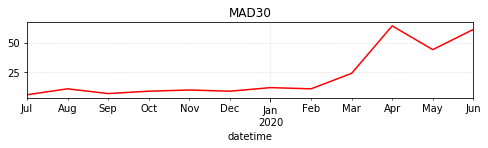

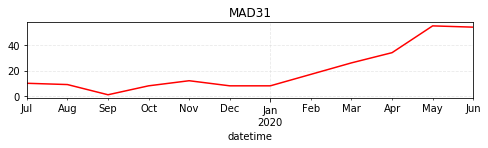

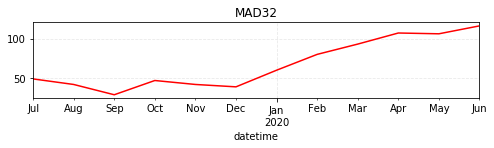

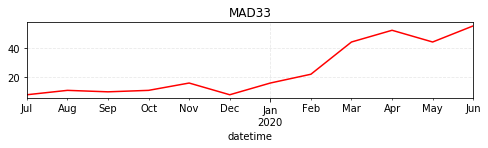

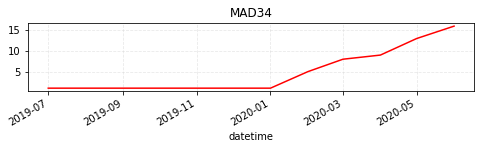

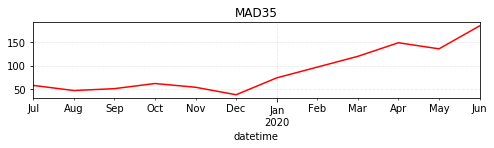

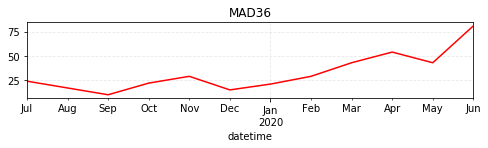

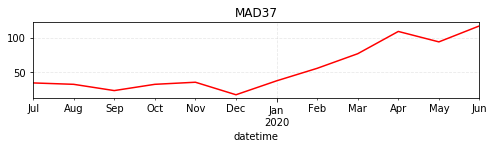

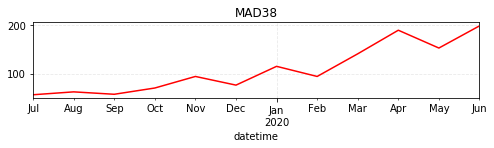

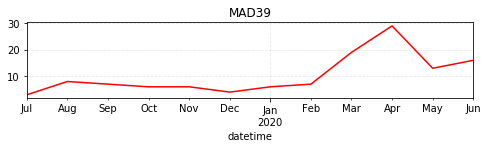

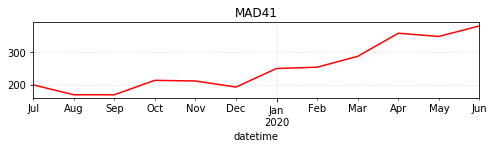

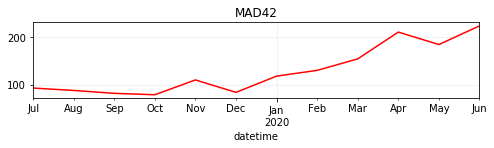

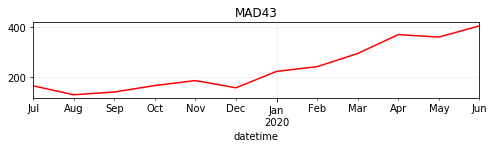

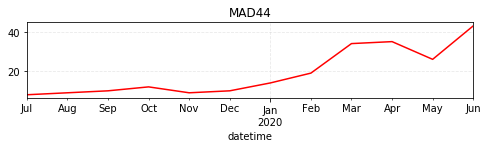

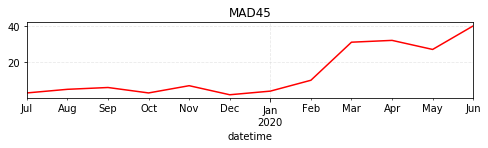

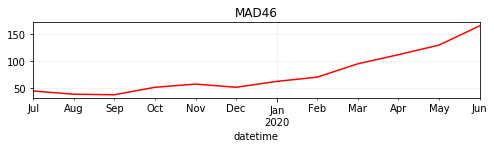

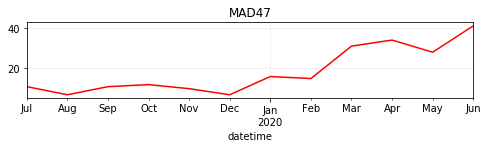

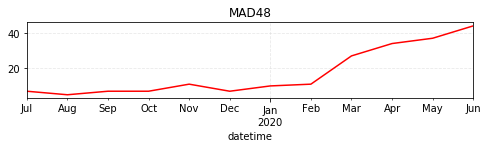

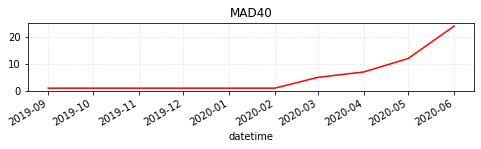

In [12]:
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize']= [8, 4*len(group)]

i=1
for group_name in group:
    g_tmp = df[df["Group_num"]==group_name]

    fig = plt.figure()
    ax = fig.add_subplot(48, 1, i)

    g_tmp.groupby('datetime')['Buyer_cnt'].size().plot(figsize=(8,80), c='r')        
    ax.set_title(group_name)
    plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
    i=i+1

- 그룹별 종목별 매수 그래프

월별 종목을 매수한 수 < 2 인 것만 추출

In [13]:
g_tmp = df[df["Group_num"]=='MAD02'].drop("Group_num", axis=1)
g_tmp.groupby('datetime')['Buyer_cnt'].size()

datetime
2019-07-01     3
2019-08-01     4
2019-10-01     4
2019-11-01     2
2019-12-01     3
2020-01-01     6
2020-02-01     5
2020-03-01    24
2020-04-01    22
2020-05-01    14
2020-06-01    21
Name: Buyer_cnt, dtype: int64

In [14]:
g_MAD02 = df2[df2["Group_num"]=='MAD02']
# g_MAD49 = g_MAD49.groupby(['datetime', 'Stock_num'])['Buyer_cnt'].sum().unstack().dropna(axis=1)
g_MAD02.shape[0]

108

In [16]:
k = g_MAD02['Stock_num'].value_counts()
k2 = pd.DataFrame(k)
k_idx = k2[k2['Stock_num']<2].index

for i in k_idx:
    g_MAD02 = g_MAD02.drop(g_MAD02[g_MAD02.Stock_num==i].index)

In [17]:
g_MAD02.shape[0]

93

In [18]:
g_1 = g_MAD02.groupby(['datetime', 'Stock_num'])['Buyer_cnt'].sum().unstack().dropna(axis=1, thresh=3)
g_1 # shape=(11,26)->(11,17)

Stock_num,A000660,A000720,A003490,A005380,A005930,A005935,A006800,A020560,A035420,A035720,A042670,A055550,A066570,A096770,A105560,A180640,A215600
datetime,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2019-10-01,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2019-11-01,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2019-12-01,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,3.0,NaN,0.0,8.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,18.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2020-03-01,6.0,NaN,5.0,8.0,30.0,10.0,6.0,4.0,NaN,5.0,NaN,9.0,7.0,5.0,7.0,3.0,NaN
2020-04-01,13.0,5.0,9.0,11.0,24.0,NaN,5.0,6.0,3.0,3.0,4.0,8.0,NaN,5.0,10.0,5.0,NaN


NaN -> 0으로 처리

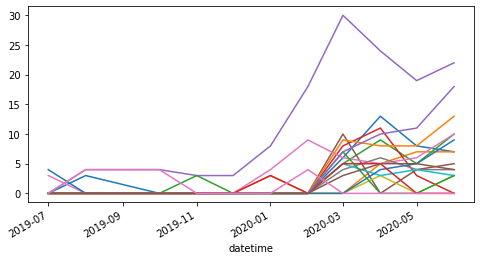

In [19]:
g_MAD02.groupby(['datetime', 'Stock_num'])['Buyer_cnt'].sum().unstack().dropna(axis=1, thresh=3).fillna(0).plot(figsize=(8,4), legend=None)

모든 그룹에 적용

<Figure size 576x13824 with 0 Axes>

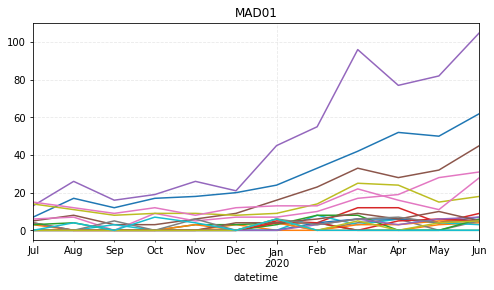

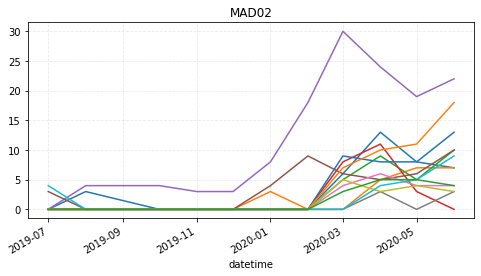

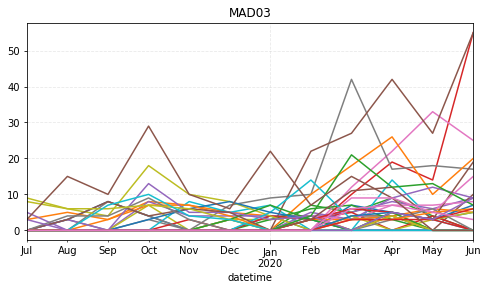

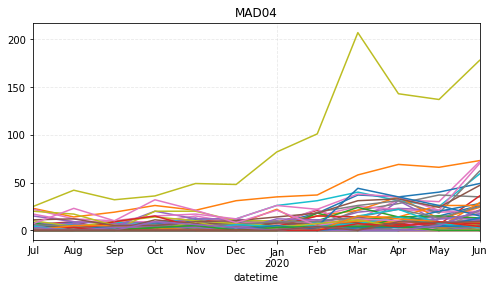

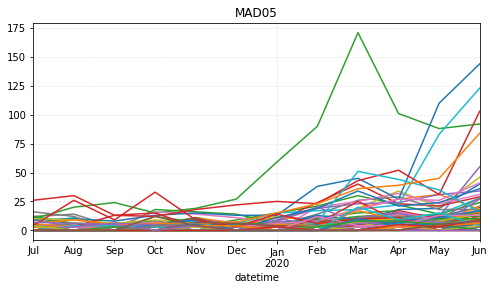

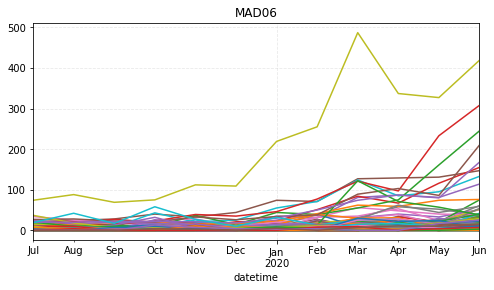

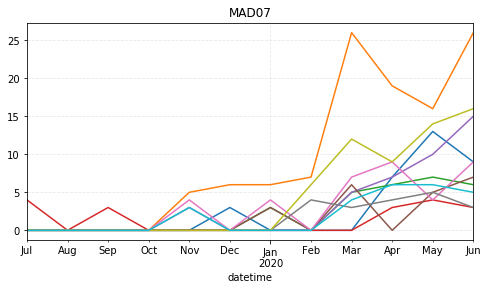

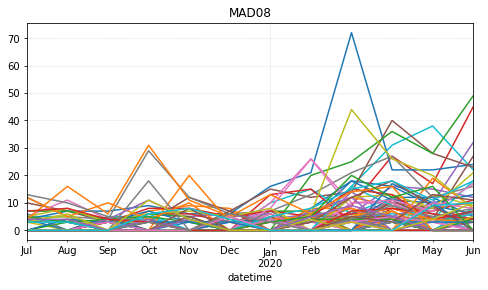

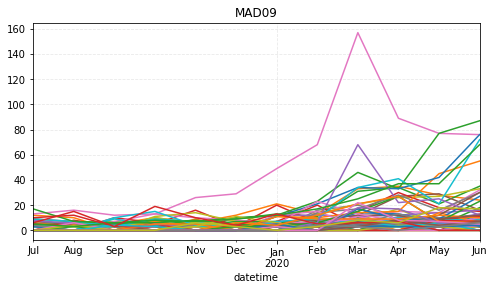

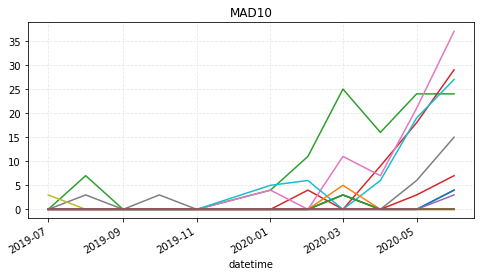

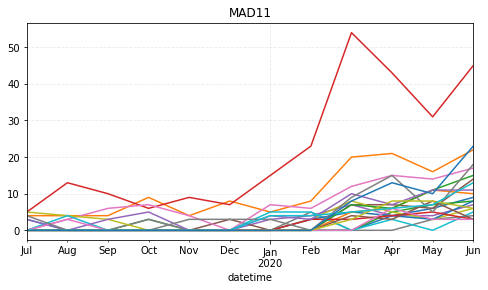

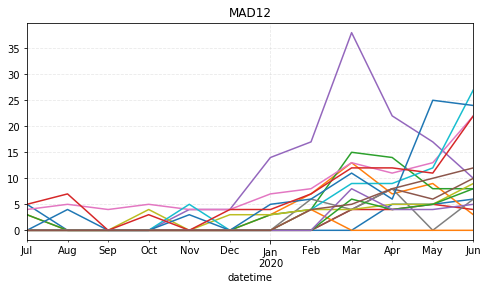

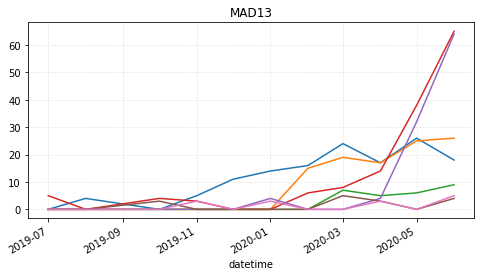

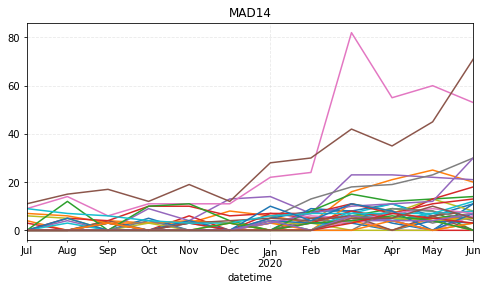

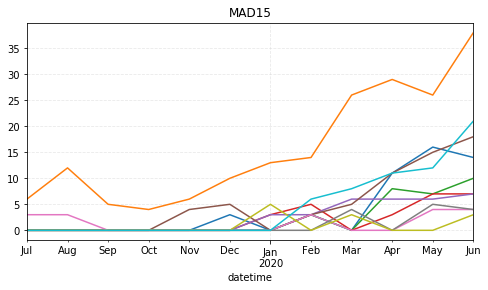

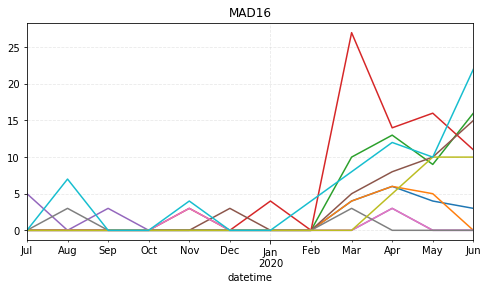

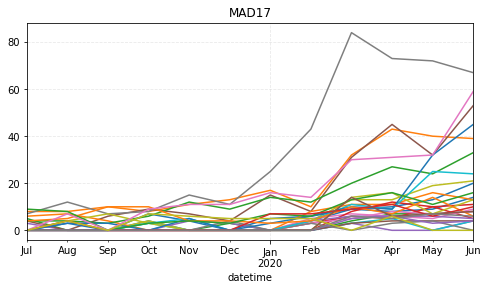

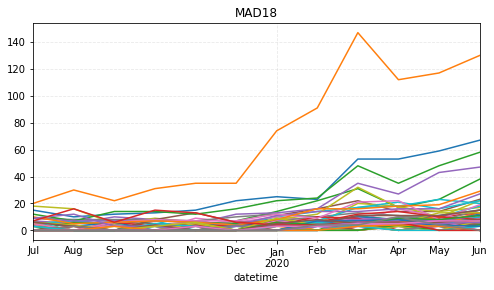

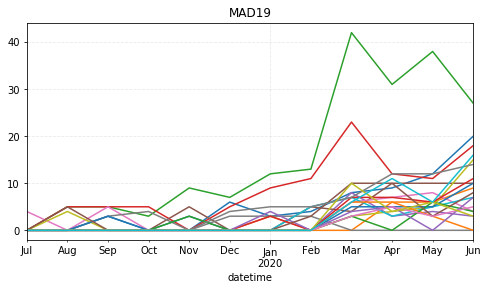

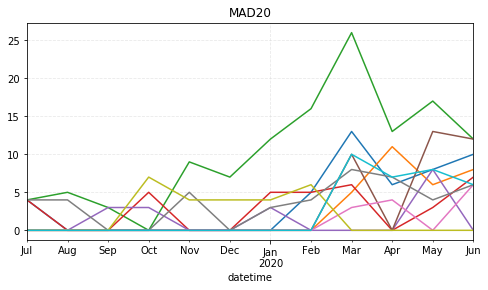

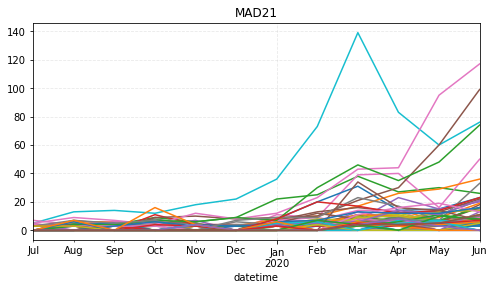

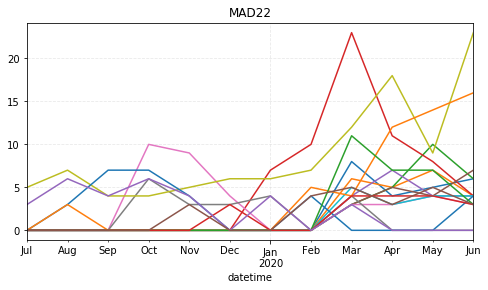

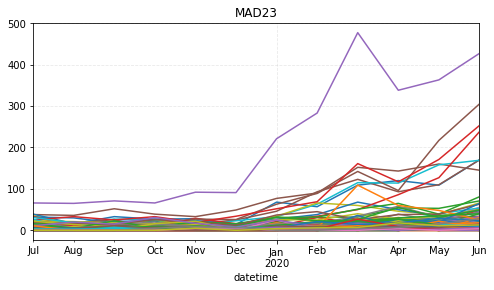

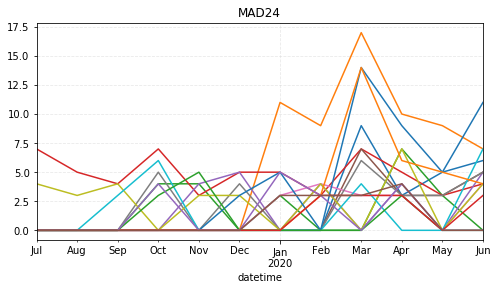

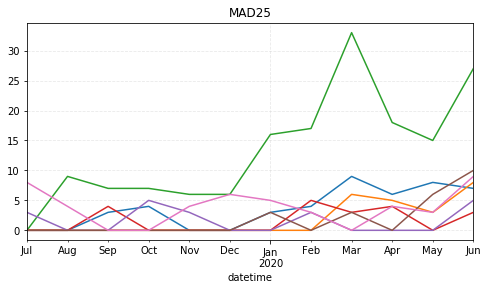

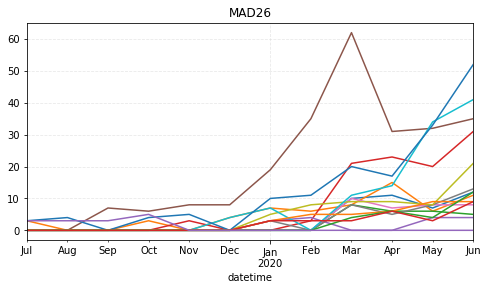

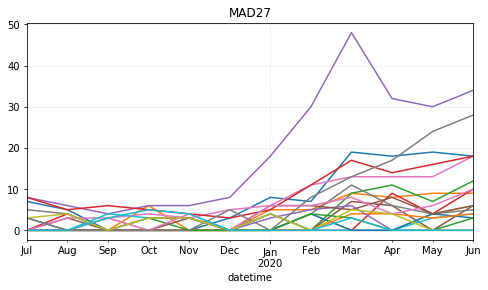

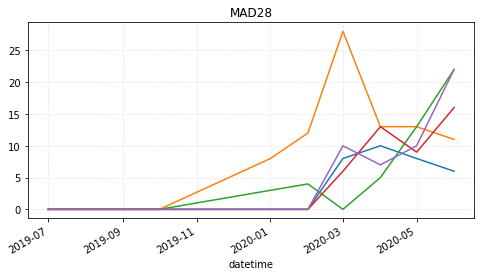

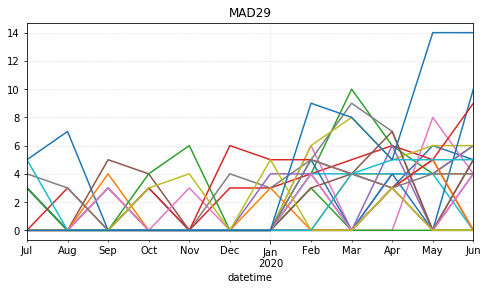

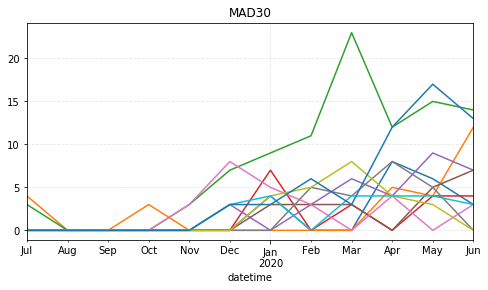

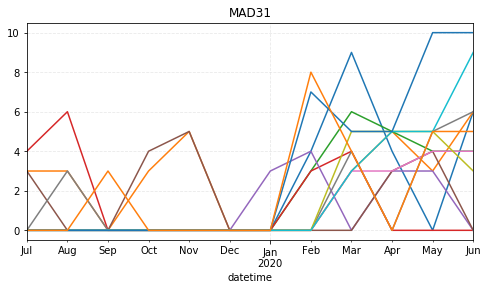

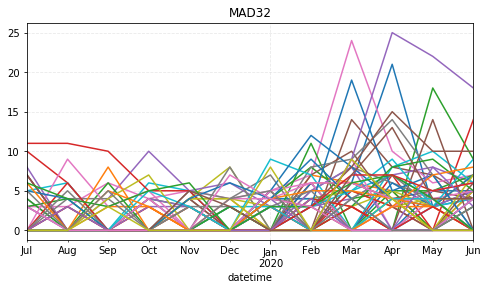

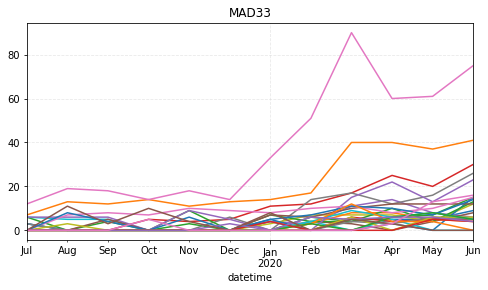

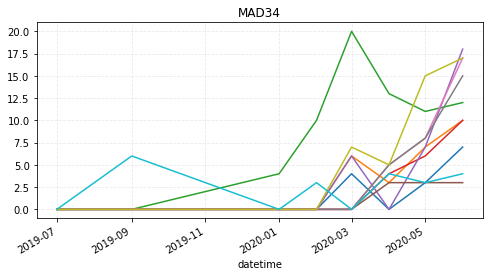

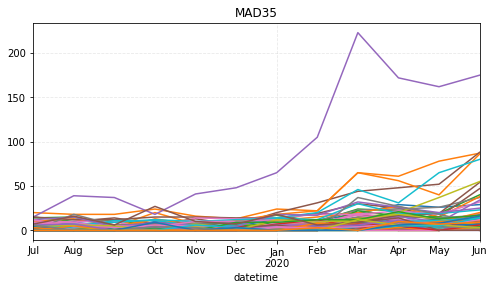

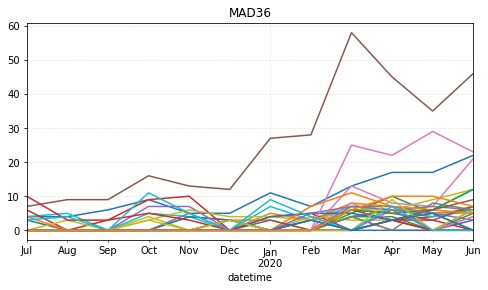

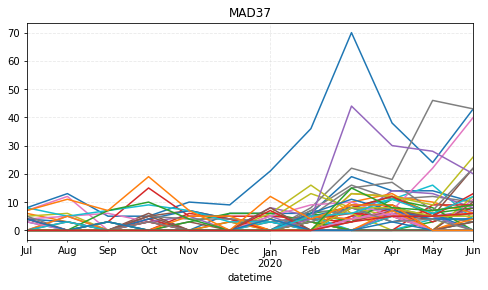

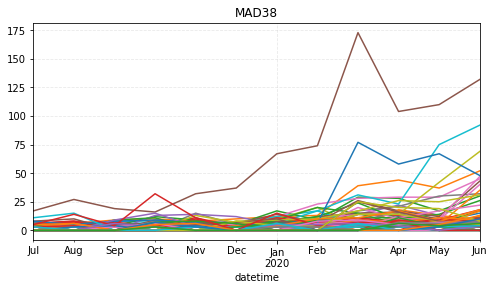

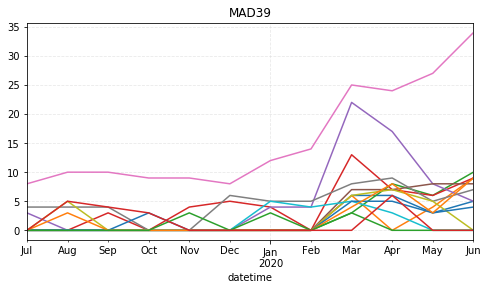

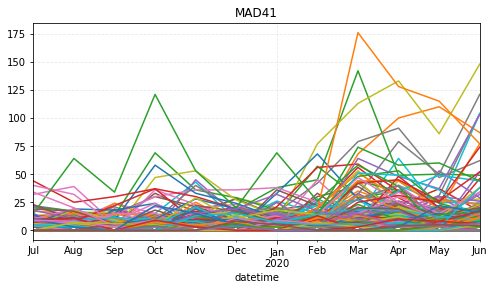

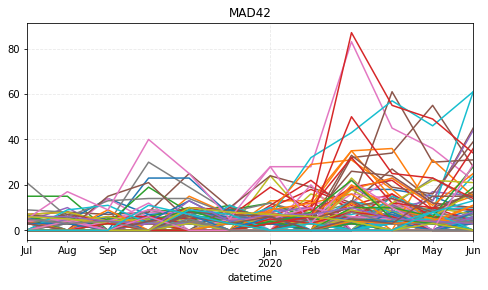

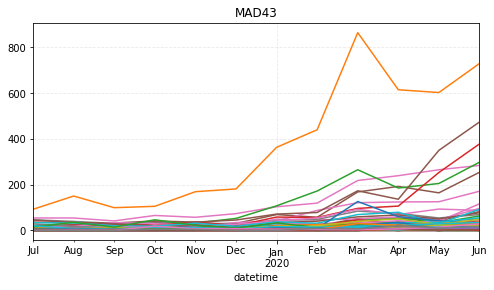

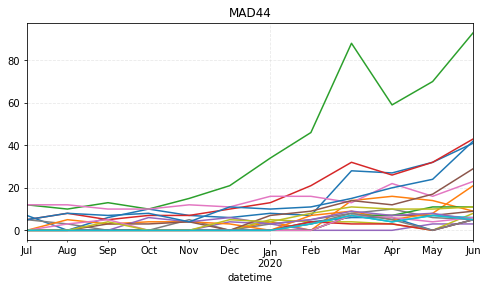

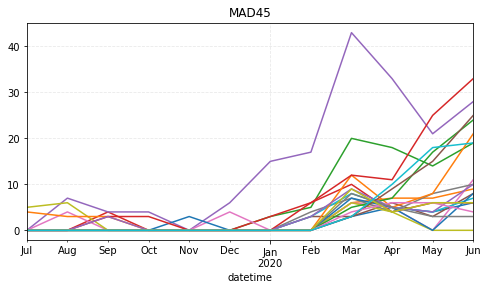

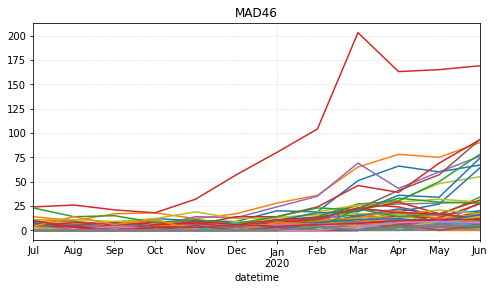

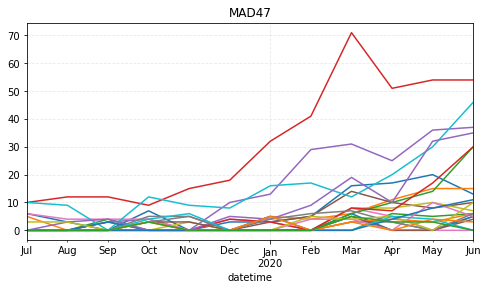

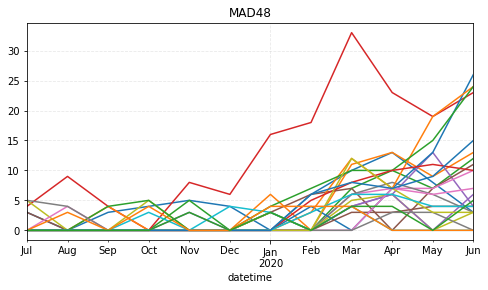

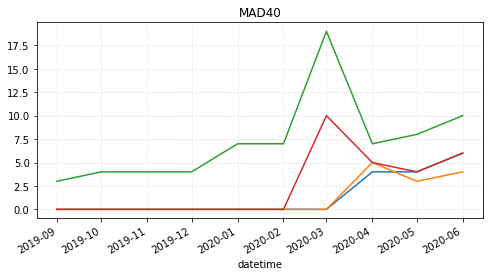

In [20]:
plt.rcParams.update({'figure.max_open_warning': 0})

i=1
cnt=0
list=[]

fig = plt.figure()
for group_name in group:
    g_tmp = df[df["Group_num"]==group_name]
    g_tmp = g_tmp.groupby(['datetime', 'Stock_num'])['Buyer_cnt'].sum().unstack()
    
    if g_tmp.shape[1] < 20:
        g_tmp = g_tmp.fillna(0)
    elif g_tmp.shape[1] < 40:
        g_tmp = g_tmp.dropna(axis=1, thresh=3).fillna(0) # 3번 이상 매수한 종목만
    else:
        g_tmp = g_tmp.dropna(axis=1, thresh=4).fillna(0) # 4번 이상 매수한 종목만

    if g_tmp.empty:
        list.append(group_name)
        continue
    
    i=i+1
    g_tmp.plot(figsize=(8,4), legend=None)
    plt.title(group_name)
    plt.grid(color='lightgrey', alpha=0.5, linestyle='--')

#### 그래프 그리고 든 생각
2) 19년 12월 & 20년 2월 기준으로 매수고객 수가 급 바뀌는 경향이 있음.

날짜를 자르면 정확도가 올라갈지도?

MAD24 MAD29...

매도 고객 수 그래프도 그려봐야 할 듯. 

stocks data를 군집화해서 feature로 넣어도 될 것 같음.(stocks data) 따로 분석해야 됨/

그리고 주식예측 정확도? & 주식 변동성.. 넣어보는 것도 좋을 것 같은데
